In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Churn.csv')
dataset.head()


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [2]:
#missing values
print(dataset.isnull().sum())
print(dataset.describe)

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
<bound method NDFrame.describe of      Customer ID  Gender  Senior Citizen Partner Dependents  tenure  \
0     7590-VHVEA  Female               0     Yes         No       1   
1     7590-VHVEG  Female               0     Yes         No       1   
2     5575-GNVDE    Male               0      No         No      34   
3     3668-QPYBK    Male               0      No         No       2   
4     7795-CFOCW    Male               0      No         No      45   
...          ...     ...             ...    

Churn
No     5175
Yes    1869
Name: count, dtype: int64


C:\Users\SEBABE\AppData\Local\Temp\ipykernel_1668\1168429763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=dataset,palette='coolwarm')


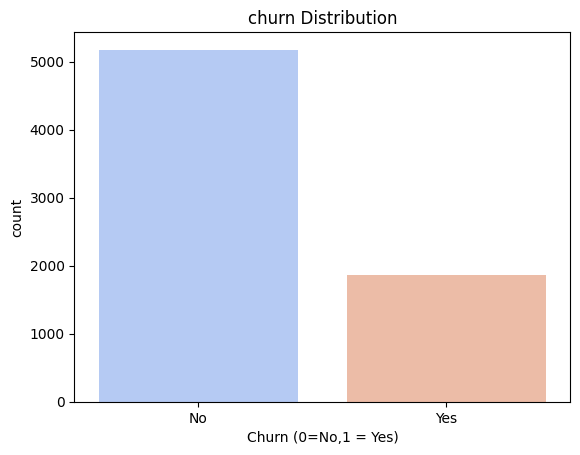

In [3]:
#churn Distribution
import seaborn as sns
import matplotlib.pyplot as plt

print(dataset['Churn'].value_counts())
sns.countplot(x='Churn',data=dataset,palette='coolwarm')
plt.title('churn Distribution')
plt.xlabel('Churn (0=No,1 = Yes)')

plt.ylabel('count')
plt.show()


In [4]:
#handling missing incorrect values
import warnings
warnings.filterwarnings('ignore')
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'],errors='coerce')
dataset['Total Charges'].fillna(dataset['Total Charges'].median(),inplace=True)

In [5]:
#Handling Categorial Variables
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
categorical_cols= ['Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Paperless Billing','Churn','Tech Support','Contract','Payment Method','Streaming TV','Streaming Movies']

for col in categorical_cols:dataset[col] = labelencoder.fit_transform(dataset[col])

In [6]:
from sklearn.model_selection import train_test_split


x = dataset.drop ( ['Customer ID','Churn'], axis=1)
y = dataset['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling 
#model training
#